In [396]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import nltk
from nltk.tokenize import *
from sklearn.cluster import *
from sklearn.model_selection import *
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats


set_matplotlib_formats('retina')
%pylab inline
plt.style.use('ggplot')


Populating the interactive namespace from numpy and matplotlib


/Users/Haebichan/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Rectangle', 'load']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
# r = requests.get('https://www.lyricsondemand.com/k/kendricklamarlyrics/allthestarslyrics.html')
# soup = BeautifulSoup(r.text, 'html.parser')

In [48]:
# result = soup.find('div', class_='lcontent').get_text(strip = True)

In [51]:
# result

"[Kendrick Lamar]Love, let's talk about loveIs it anything and everything you hoped for?Or do the feeling haunt you?I know the feeling haunt you[SZA]This may be the night that my dreams might let me knowAll the stars approach you, all the stars approach you, all the stars approach youThis may be the night that my dreams might let me knowAll the stars are closer, all the stars are closer, all the stars are closer[Kendrick Lamar]Tell me what you gon' do to meConfrontation ain't nothin' new to meYou can bring a bullet, bring a sword, bring a morgueBut you can't bring the truth to meF*ck you and all your expectationsI don't even want your congratulationsI recognize your false confidenceAnd calculated promises all in your conversationI hate people that feel entitledLook at me crazy 'cause I ain't invite youOh, you important?You the moral to the story? You endorsin'?Motherf*cker, I don't even like youCorrupt a man's heart with a giftThat's how you find out who you dealin' withA small percent

In [180]:
k = requests.get('https://www.lyricsondemand.com/tophits/')
soup = BeautifulSoup(k.text, 'html.parser')

In [181]:
links = [a['href'] for a in soup.find_all('a',href = True)]


In [182]:
links = [i for i in links if 'index.html' not in i]
links = [i for i in links if i.endswith('.html')]

In [183]:
links = links[8:-7]

In [184]:
links = [i[2:] for i in links]

In [196]:
links_sample = links[-50:]

In [202]:
links

['/k/kendricklamarlyrics/allthestarslyrics.html',
 '/c/carterslyrics/apeshitlyrics.html',
 '/j/jcolelyrics/atmlyrics.html',
 '/p/postmalonelyrics/ballformelyrics.html',
 '/n/nickiminajlyrics/barbietingzlyrics.html',
 '/c/cardiblyrics/bartiercardilyrics.html',
 '/c/cardiblyrics/becarefullyrics.html',
 '/e/ellamailyrics/booduplyrics.html',
 '/w/weekndlyrics/calloutmynamelyrics.html',
 '/n/nickiminajlyrics/chunlilyrics.html',
 '/t/taylorswiftlyrics/delicatelyrics.html',
 '/d/drakelyrics/diplomaticimmunitylyrics.html',
 '/c/cardiblyrics/driplyrics.html',
 '/t/taylorswiftlyrics/endgamelyrics.html',
 '/l/lilpumplyrics/esskeetitlyrics.html',
 '/b/btslyrics/fakelovelyrics.html',
 '/j/justintimberlakelyrics/filthylyrics.html',
 '/b/brunomarslyrics/finesseremixlyrics.html',
 '/l/lildickylyrics/freakyfridaylyrics.html',
 '/m/marshmellolyrics/friendslyrics.html',
 '/m/maroon5lyrics/girlslikeyoulyrics.html',
 '/d/drakelyrics/godsplanlyrics.html',
 '/c/charlieputhlyrics/howlonglyrics.html',
 '/c/car

In [207]:
k = []
for i in range(len(links)):
    try:
        request = requests.get('https://www.lyricsondemand.com' + links_sample[i])
        soup = BeautifulSoup(request.text, 'html.parser')
        results = soup.find('div', class_= 'lcontent').get_text(strip = True)
        k.append(results)
    except IndexError:
        break


In [231]:
songs = pd.DataFrame(k)

In [238]:
request = requests.get('http://www.metrolyrics.com/top100-electronic.html')
soup = BeautifulSoup(request.text, 'html.parser')


In [239]:
links2 = [a['href'] for a in soup.find_all('a',href = True)]

In [245]:
links2

['http://www.metrolyrics.com/top100-electronic.html?PageSpeed=noscript',
 'http://www.metrolyrics.com/',
 'http://www.metrolyrics.com/top100.html',
 'http://www.metrolyrics.com/videos.html',
 'http://www.metrolyrics.com/news.html',
 'http://www.metrolyrics.com/top-artists.html',
 'https://secure.metrolyrics.com/secure/account-setting.html',
 'http://www.metrolyrics.com/top100.html',
 'http://www.metrolyrics.com/rolling-stone-top500.html',
 'http://www.metrolyrics.com/add.html',
 'http://www.metrolyrics.com/add.html',
 'http://www.metrolyrics.com/top100.html',
 'http://www.metrolyrics.com/top100-pop.html',
 'http://www.metrolyrics.com/top100-rock.html',
 'http://www.metrolyrics.com/top100-hiphop.html',
 'http://www.metrolyrics.com/top100-metal.html',
 'http://www.metrolyrics.com/top100-electronic.html',
 'http://www.metrolyrics.com/top100-rb.html',
 'http://www.metrolyrics.com/top100-jazz.html',
 'http://www.metrolyrics.com/top100-country.html',
 'http://www.metrolyrics.com/top100-folk.

In [246]:
request = requests.get('http://www.metrolyrics.com/everybodys-free-to-wear-sunscreen-lyrics-baz-luhrmann.html')
soup = BeautifulSoup(request.text, 'html.parser')


In [269]:
k = soup.find_all('p', class_ = 'verse')

In [272]:
l = []
for i in links2:
    try:
        request = requests.get(i)
        soup = BeautifulSoup(request.text, 'html.parser')
        results = soup.find_all('p', class_= 'verse')
        l.append(results)
    except IndexError:
        break


In [288]:
import numpy as np
arr = np.array(l)

In [428]:
df_arr =pd.DataFrame(arr)

In [432]:
df_arr[0] = df_arr[0].apply(lambda x: ','.join(map(str, x)))

In [441]:
df_arr = df_arr.apply(lambda x: x.str.strip()).replace('', np.nan)

In [444]:
df_arr = df_arr[df_arr[0].notnull()]

In [456]:
df_arr = df_arr[df_arr.duplicated() != True]

In [517]:
df_arr2 = df_arr.copy()

In [518]:
df_arr2.reset_index(inplace = True)

In [519]:
df_arr2.drop('index', 1, inplace = True)

In [520]:
df_arr2[0] = df_arr2[0].str.replace('<p class="verse">', ' ') 
df_arr2[0] = df_arr2[0].str.replace('<br/>', '')
df_arr2[0] = df_arr2[0].str.replace('\n', '. ')
df_arr2[0] = df_arr2[0].str.replace('</p>', '')

In [522]:
request = requests.get('http://www.metrolyrics.com/top100-electronic.html')
soup = BeautifulSoup(request.text, 'html.parser')
results = soup.find_all('span', class_= 'artist')


In [524]:
results

[<span class="artist">
 <a class="subtitle" href="http://www.metrolyrics.com/baz-luhrmann-lyrics.html" onmousedown="ev('Top Songs','searcha:baz-luhrmann');" title="Baz Luhrmann">
 Baz Luhrmann	</a>
 </span>, <span class="artist">
 <a class="subtitle" href="http://www.metrolyrics.com/ritviz-lyrics.html" onmousedown="ev('Top Songs','searcha:ritviz');" title="Ritviz">
 Ritviz	</a>
 </span>, <span class="artist">
 <a class="subtitle" href="http://www.metrolyrics.com/marshmello-lyrics.html" onmousedown="ev('Top Songs','searcha:marshmello');" title="Marshmello">
 Marshmello	</a>
 </span>, <span class="artist">
 <a class="subtitle" href="http://www.metrolyrics.com/clean-bandit-lyrics.html" onmousedown="ev('Top Songs','searcha:clean-bandit');" title="Clean Bandit">
 Clean Bandit	</a>
 </span>, <span class="artist">
 <a class="subtitle" href="http://www.metrolyrics.com/alan-walker-lyrics.html" onmousedown="ev('Top Songs','searcha:alan-walker');" title="Alan Walker">
 Alan Walker	</a>
 </span>, 

In [333]:
vectorizer = TfidfVectorizer(stop_words = 'english')

x = vectorizer.fit_transform(songs[0])


In [339]:
x

<50x2904 sparse matrix of type '<class 'numpy.float64'>'
	with 4918 stored elements in Compressed Sparse Row format>

In [343]:
model = KMeans(5)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [344]:
labels = model.predict(x)

In [345]:
labels

array([3, 2, 0, 1, 4, 1, 3, 0, 4, 4, 3, 1, 1, 2, 0, 1, 0, 2, 2, 3, 2, 3,
       0, 1, 0, 3, 4, 0, 2, 2, 3, 1, 1, 4, 4, 2, 1, 3, 2, 0, 0, 4, 1, 0,
       1, 1, 1, 1, 2, 3], dtype=int32)

In [346]:
centroids = model.cluster_centers_

In [353]:
names = vectorizer.get_feature_names()

In [365]:
clusters =centroids.argsort()[:,-1:-10:-1]

In [372]:
k = []
for i in clusters:
    for j in i:
        k.append(names[j])
    

In [377]:
centroids.shape

(5, 2904)

In [383]:
np.array(k).reshape(clusters.shape)

array([['make', 'aah', 'magic', 'like', 'pray', 'gonna', 'la', 'secrets',
        'kiss'],
       ['ll', 'eh', 'let', 'na', 'uh', 'want', 'just', 'baby', 'really'],
       ['oh', 'lover', 'solo', 'come', 'wanna', 'right', 'glass', 'like',
        'whoa'],
       ['love', 'tie', 'chick', 'da', 'ain', 'sexy', 'bitch', 'like',
        'se'],
       ['exception', 'naturally', 'shark', 'comes', 'thought', 'need',
        'better', 'maybe', 'know']], dtype='<U9')

In [384]:
clusters

array([[1474,   13, 1471, 1392, 1908, 1031, 1328, 2127, 1309],
       [1417,  775, 1368, 1646, 2644, 2725, 1295,  143, 1976],
       [1720, 1452, 2279,  510, 2723, 2025, 1013, 1392, 2781],
       [1446, 2534,  451,  595,   48, 2150,  259, 1392, 2123],
       [ 825, 1654, 2161,  511, 2521, 1665,  241, 1498, 1318]])

In [386]:
songs.shape

(50, 1)

In [388]:
from scipy.cluster import *
from scipy.spatial import *
dis_array = distance.pdist(x.todense(), metric = 'cosine')

In [389]:
dis_array

array([0.90031832, 0.94711109, 0.89468531, ..., 0.96774934, 0.97678369,
       0.78447747])

In [390]:
square_dis_array = distance.squareform(dis_array)

In [392]:
linkage = hierarchy.linkage(square_dis_array)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


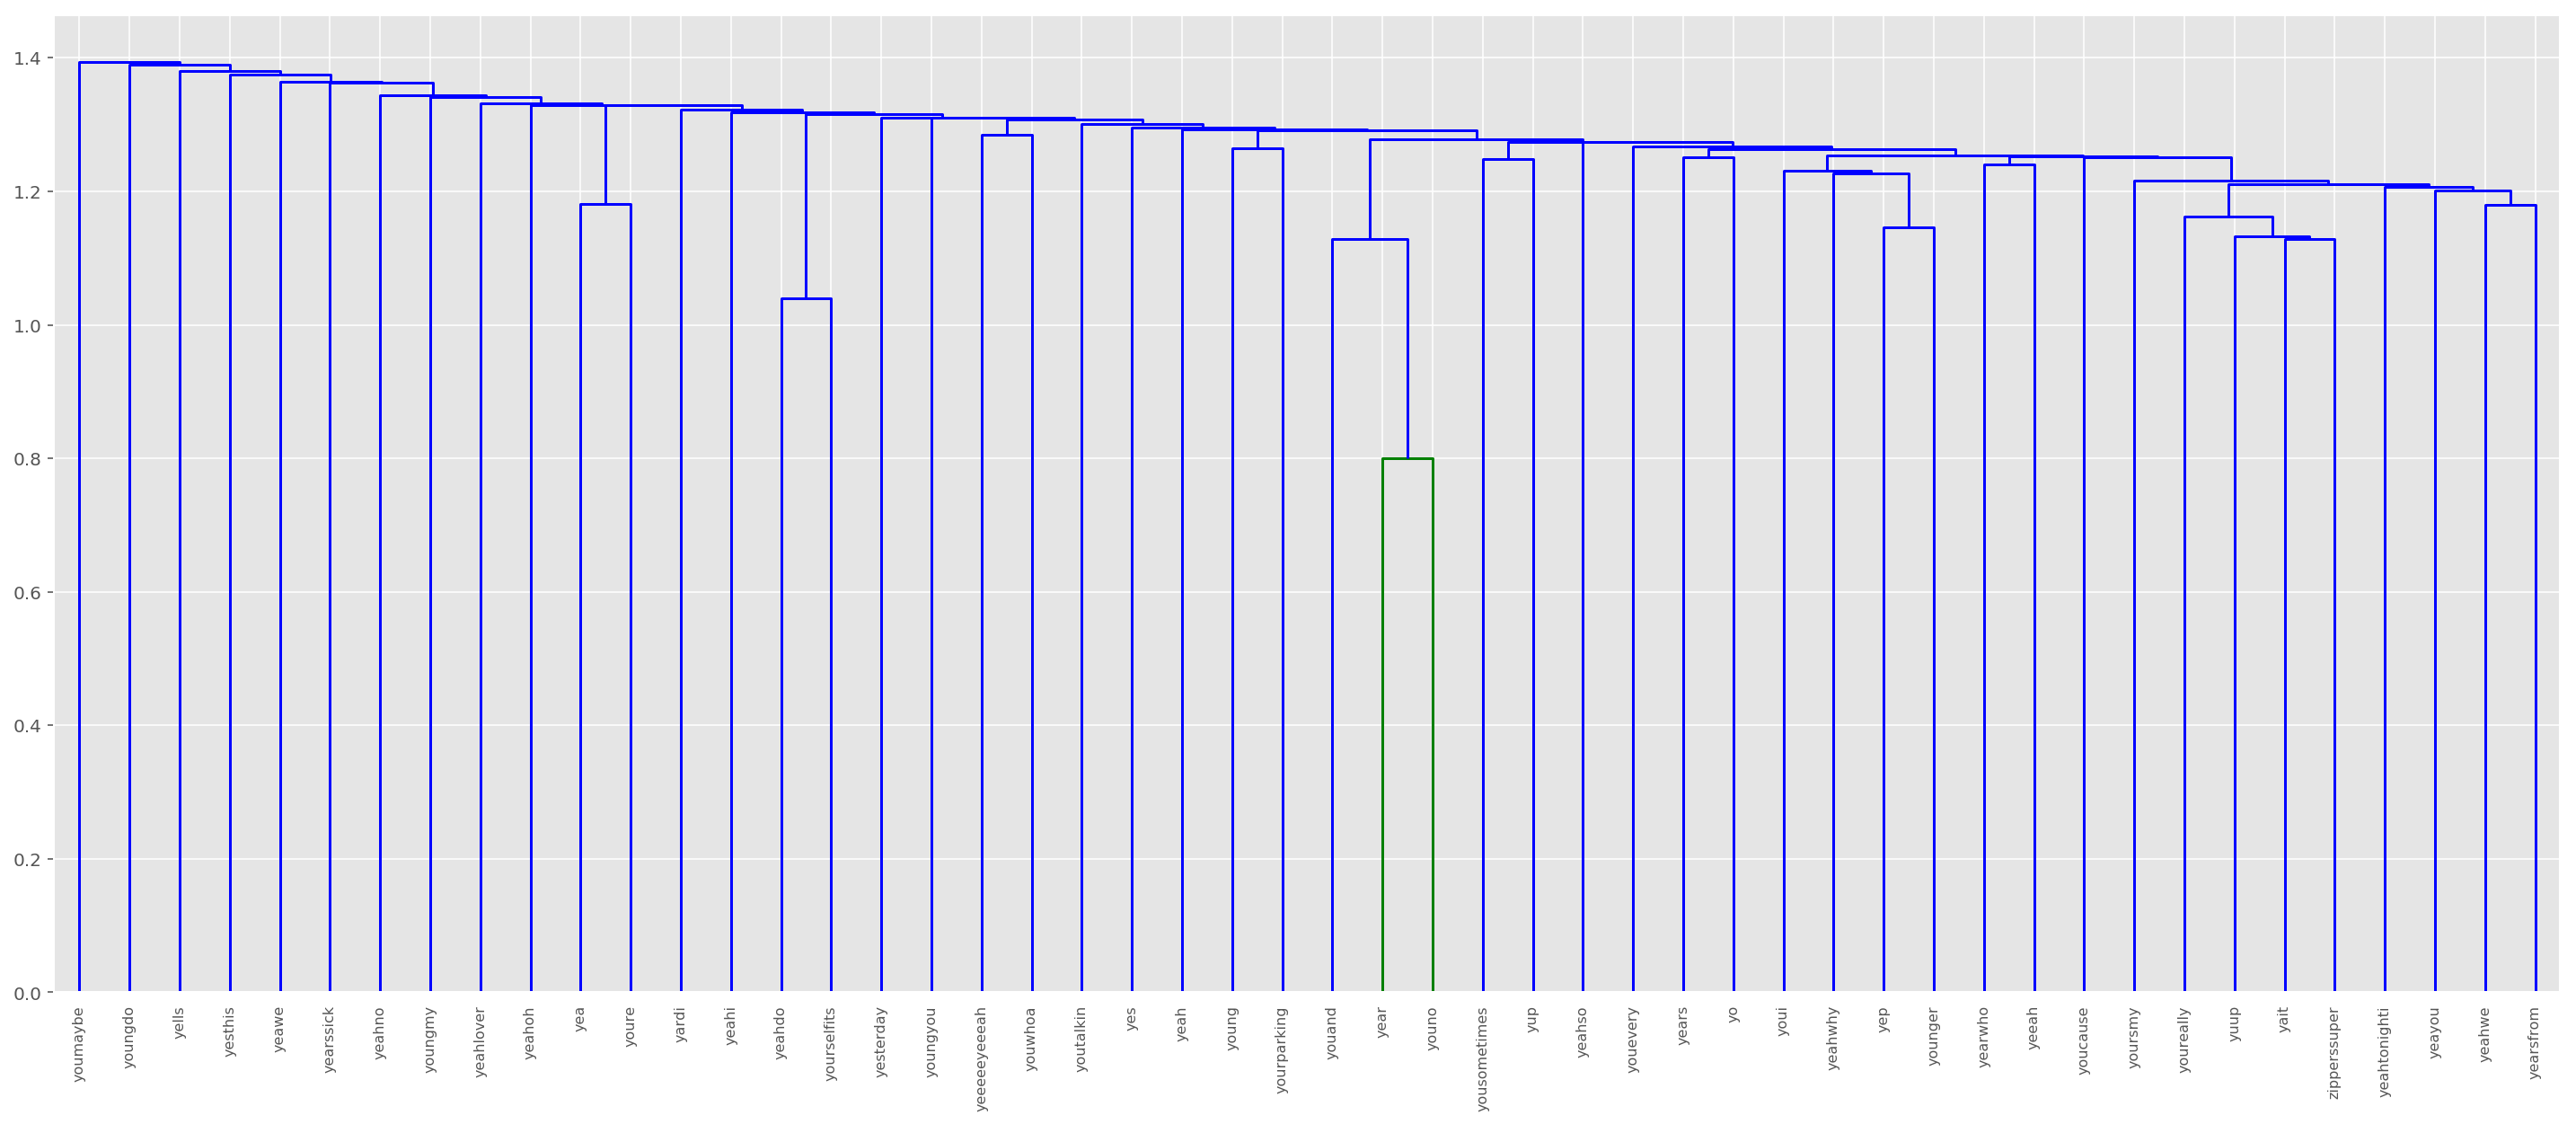

In [397]:
figure = figsize(25,10)

dendro = hierarchy.dendrogram(linkage, labels = names)



In [394]:
names_vectorized = vectorizer.get_feature_names()
l = list(dendro.values())[3]

NameError: name 'dendro' is not defined

In [ ]:
names = []
for i in l:
    names.append(names_vectorized[i])

In [425]:
all_links = []

for i in range(1,5):
    request = requests.get('https://www.letssingit.com/songs/popular/' + str(i))
    soup = BeautifulSoup(request.text, 'html.parser')
    for i in soup.find_all('a', href = True):
        all_links.append(i['href'])



ConnectionError: HTTPSConnectionPool(host='www.letssingit.com', port=443): Max retries exceeded with url: /songs/popular/1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1a1c1bf6d8>: Failed to establish a new connection: [Errno 60] Operation timed out',))